# <span style="color:blue"> 이토록 쉬운 통계 & R </span>

<img src="../image/cover.png" width="200" height="400" align="left">  임경덕 지음

## PART 4 데이터 분석 도구, R

## 23-95% R로 분석 다시보기-4-연속형변수 관계-3 (60일차)

   * 데이타프로젝트 (http://dataproject.xyz) 또는 (http://cafe.naver.com/dataartproject) 에 미리 저장된 스크립트를 다운 받을 수 있습니다.
   * 스크립트를 활용하면 직접 명령어를 입력하지 않고 저장된 명령어들을 실행할 수 있습니다.

### 데이터 파일은 dataartproject.xyz 에 있습니다.

# 두개의 연속형 변수의 관계 찾기

## 과연 아빠의 키는 아들 키에 얼마나 큰 영향을 줄까?  - 선형회귀

예전에 피어슨 통계학자가 아빠키와 아들키의 관계에 관심을 가지고 1978쌍의 키 데이터를 모았습니다. 이제 이것을 가지고 분석하고자 합니다.

먼저 read.csv() 함수로 데이터를 불러오기로 합니다.

### 1. 파일 읽기

In [1]:
# 파일 읽기
heights <- read.csv("Practice/data/heights.csv")

cat("변수이름들=", names(heights), "\n")
head(heights) 

## 원래 파일을 사용하려면 father.son 데이터를 가져와야 합니다.
#install.packages("UsingR")
#library(UsingR)
#data(father.son)


변수이름들= father son 


father,son
165.2,151.8
160.7,160.6
165.0,160.9
167.0,159.5
155.3,163.3
160.1,163.2


### 2. 데이터 요약

In [7]:
cat("아빠 평균키=",mean(heights$father), "\n")
cat("아빠 중간값=",median(heights$father), "\n")
cat("아빠 최댓값=",max(heights$father), "\n")
cat("아빠 최솟값=",min(heights$father), "\n")
cat("아빠 최솟값=",min(heights$father), "\n")
cat("아빠 범위=",range(heights$father), "\n")
cat("아빠 사분위=",quantile(heights$father), "\n\n")

cat("아빠 분산=",var(heights$father), "\n")
cat("아빠 표준편차=",sd(heights$father), "\n\n\n")


cat("아들 평균키=",mean(heights$son), "\n")
cat("아들 중간값=",median(heights$son), "\n")

cat("아들 최댓값=",max(heights$son), "\n")
cat("아들 최솟값=",min(heights$son), "\n")
cat("아들 최솟값=",min(heights$son), "\n")
cat("아들 범위=",range(heights$son), "\n")
cat("아들 사분위=",quantile(heights$son), "\n\n")

cat("아들 분산=",var(heights$son), "\n")
cat("아들 표준편차=",sd(heights$son), "\n\n\n")

아빠 평균키= 171.9252 
아빠 중간값= 172.1 
아빠 최댓값= 191.6 
아빠 최솟값= 149.9 
아빠 최솟값= 149.9 
아빠 범위= 149.9 191.6 
아빠 사분위= 149.9 167.1 172.1 176.8 191.6 

아빠 분산= 48.61361 
아빠 표준편차= 6.972346 


아들 평균키= 174.4572 
아들 중간값= 174.3 
아들 최댓값= 199 
아들 최솟값= 148.6 
아들 최솟값= 148.6 
아들 범위= 148.6 199 
아들 사분위= 148.6 170 174.3 179 199 

아들 분산= 51.1327 
아들 표준편차= 7.150713 




### 요약용 그래프

QQ 그래프를 보면 아들키와 아빠키는 정규 분포를 따르는 것 처럼 보입니다.

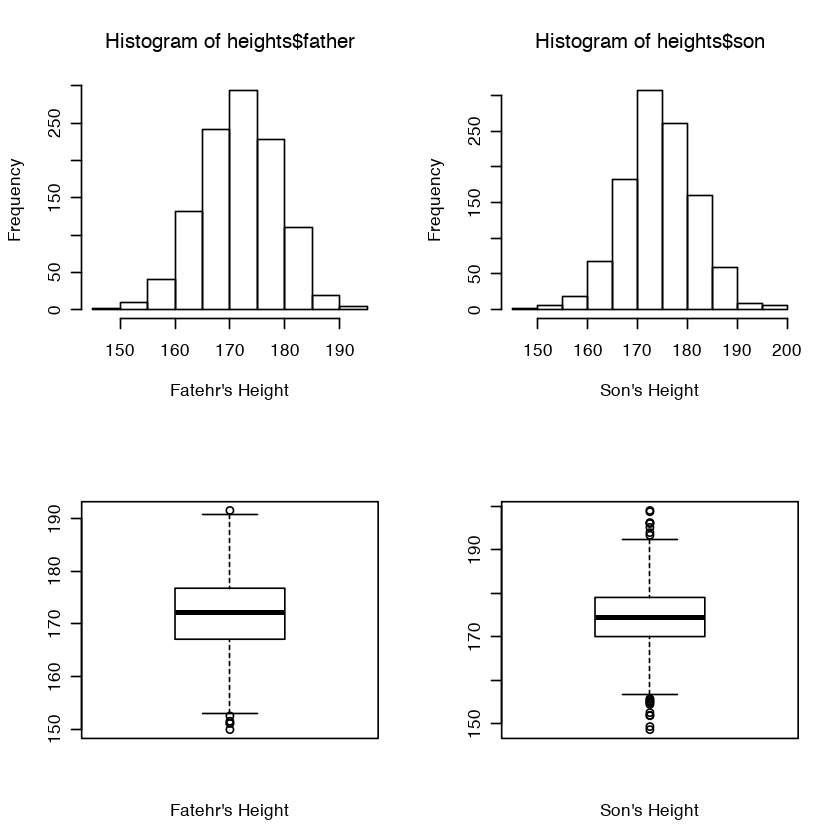

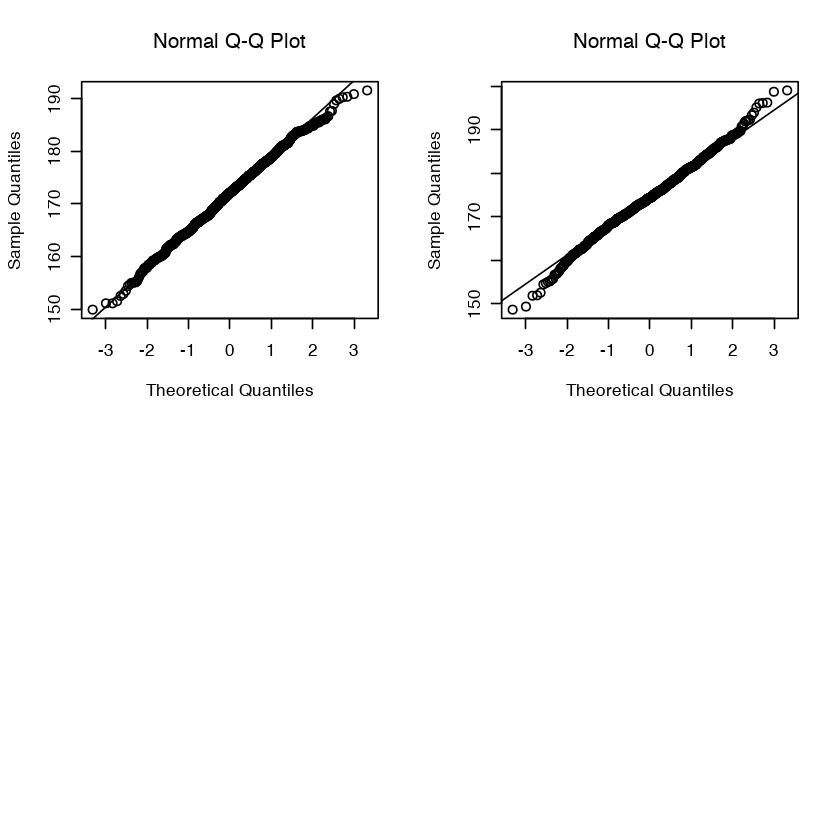

In [3]:
par(mfrow= c(2,2))
hist(heights$father, xlab="Fatehr's Height")
hist(heights$son, xlab="Son's Height")

boxplot(heights$father, xlab="Fatehr's Height")
boxplot(heights$son, xlab="Son's Height")

qqnorm(heights$father)
qqline(heights$father)
qqnorm(heights$son)
qqline(heights$son)

cat("QQ 그래프를 보면 아들키와 아빠키는 정규 분포를 따르는 것 처럼 보입니다.")

### 3. 아빠키와 아들키 관계 분석 -- 회귀분석

In [14]:
scatterhistaline = function(x, y, xlab="", ylab=""){
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y, pch=16, col=rgb(0.2,0.2,0.2,0.5))
  abline(v=mean(x), lty=2)
  abline(h=mean(y), lty=2)
  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

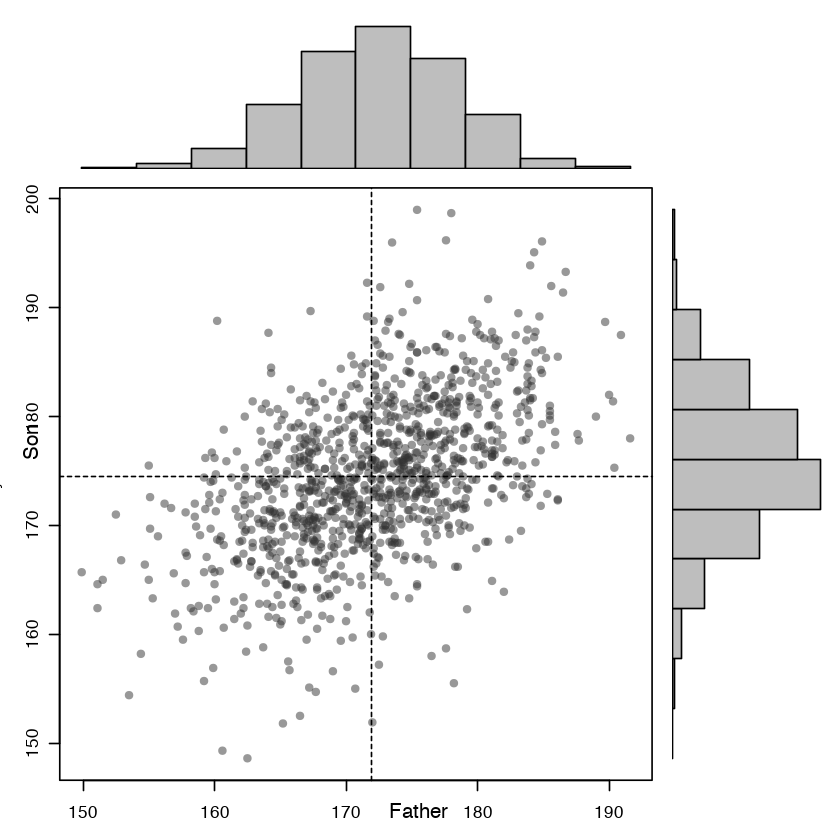

In [15]:
with(heights, scatterhistaline(father, son, xlab="Father", ylab="Son"))

In [6]:
# 상관계수를 구하여 보면 0.5 입니다.
with(heights, cor(x=father, y=son))

[1] 0.5010942

다음은 선형 회귀 식을 이용하여 좀더 자세하게 관계를 분석해보도록 하자.

페이지 217 리뷰

두 변수의 상관계수가 0.5 이므로 위 그래프에서 아빠 평균키와 아들 평균키가 만나는 교차점을 원점으로 하여 기울기가 0.5인 직선의 식을 구하면 다음과 같습니다.

$$ 
표준화된 아들키 = 0.5 \times 표준화된 아빠키
$$

이것을 풀어보면 다음과 같습니다.

$$
\dfrac{아들키 - 아들키 평균}{아들키 표준편차} = 0.5 \times \dfrac{아빠키 - 아빠키 평균}{아빠키 표준편차}
$$

이것을 좌우변 정리하여 아들키로 식을 변경하면

$$
아들키 = 0.5 \times \dfrac{아들키 표준편차}{아빠키 표준편차} \times (아빠키 - 아빠키 평균) + 아들키 평균
$$

최종 정리하면 아들키 표준편차 = 7.15cm, 아빠키 표준편차 = 6.97cm 이므로
$$
아들키 = 0.5 \times \dfrac{7.15}{6.97} \times (아빠키 - 171.93) + 174.46
$$

$$
아들키 = 0.514 \times 아빠키 + 86.07 
$$

이 됩니다.

이 관계를 R 에서는 lm() 함수로 지원합니다. 이제 lm() 함수에 대해서 알아 보기로 하자.

In [8]:
lm_height = lm(son ~ father, data = heights)

* data : 사용하는 데이터 변수
* 모형식 (formula) : 모형식은 관심갖는 변수의 관계를 설정하는데 사용합니다. 이번 경우에는 아들키 가 아빠키와 관계에 관심을 가지고 있습니다. 즉 아들키를 아빠키로 설명하고자 합니다. 이런 경우 아들키 를 먼저 표시하고 다음 "~" 를 사용하고 나서 아빠키를 표시합니다. 즉 son ~ father 가 됩니다.

이제 결과를 확인해 보자.

In [9]:
summary(lm_height)


Call:
lm(formula = son ~ father, data = heights)

Residuals:
     Min       1Q   Median       3Q      Max 
-22.5957  -3.8614   0.0091   4.1230  22.7570 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 86.10257    4.65558   18.49   <2e-16 ***
father       0.51391    0.02706   18.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.191 on 1076 degrees of freedom
Multiple R-squared:  0.2511,	Adjusted R-squared:  0.2504 
F-statistic: 360.8 on 1 and 1076 DF,  p-value: < 2.2e-16


* 제일 먼저 관심 가질 값은 father 의 p 값입니다. 이값은 father 의 t 값 18.99 가 회귀모형 $\beta_1$ 의 유의성을 따지기 떄문입니다.  이에 대한 것은 따로 회귀 분석에서 다시 정리 할 예정입니다. 단 여기서는 $\beta_1$ 이 유의하며 따라서 회귀모형이 의미있는지 여부를 따지기만 합니다.  
* 여기서는 t 값의 유의성에 대한 것인데 위 결과에서는 $Pr(\gt |t|)$ 에서 $Pr(t > |18.99|)$ 를 따지는 것으로 거의 0 입니다.
* 즉 $\beta_1$ , 아빠키의 아들에 대한 영향력이 크다고 할 수 있다고 해석됩니다.
* 이것은 귀무가설 $H_0$ 가 $\beta_1$ 이 0 인지 아닌지 검정하는 것입니다.

 아들 키는 Estimate 의 86.10 을 y 축 절편으로 하여 아빠키에 0.51391 곱한만큼 결정됩니다.  
 즉

$$
아들키 = 0.51391 \times 아빠키 + 86.10257 
$$

입니다. 이것은 이전에 구한것과 같은 결과입니다. 

그래프에 구한 회귀식을 같이 표시하면 다음과 같습니다.

In [57]:
scatterhistaline_lm = function(x, y, xlab="", ylab=""){
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y, pch=16, col=rgb(0.2,0.2,0.2,0.5))
  abline(v=mean(x), lty=2)
  abline(h=mean(y), lty=2)
# 회귀식 추가
  abline(a=86.10257, b=0.51391, lty=1, col="red")
    
  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

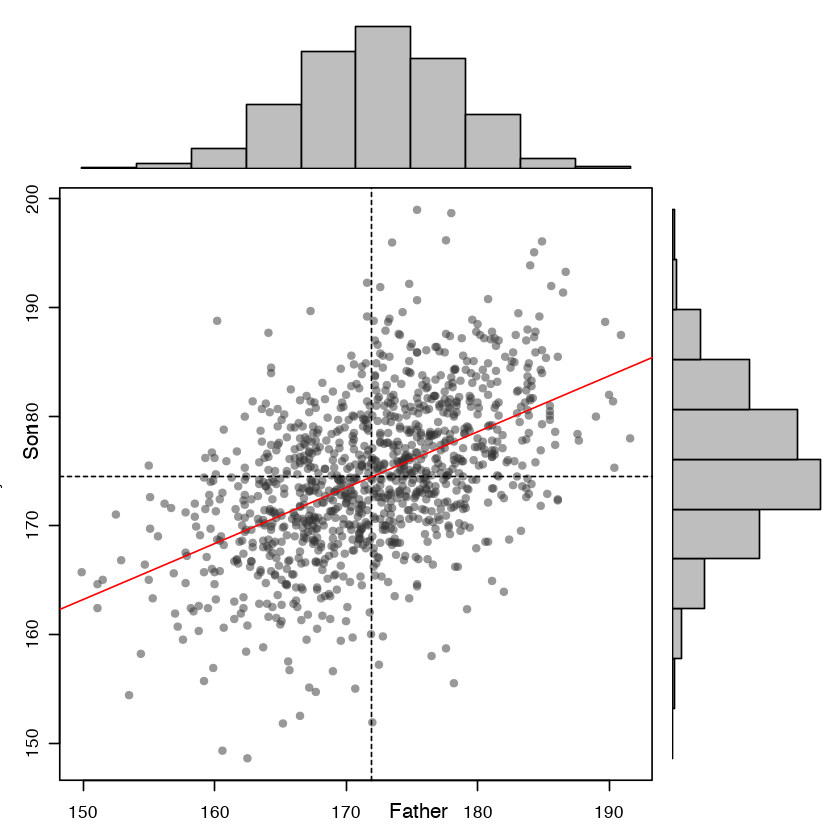

In [58]:
with(heights, scatterhistaline_lm(father, son, xlab="Father", ylab="Son"))

이번 마지막으로 아빠키 182cm 근처에서 아들키의 분포에 대해서 알아보자.

In [84]:
scatterhistaline_lm_near = function(heights, near, xlab="", ylab=""){

  x = heights$father
  y = heights$son
    
  nearl = near - 0.5
  nearh = near + 0.5
    
  zones=matrix(c(2,0,1,3), ncol=2, byrow=TRUE)
  layout(zones, widths=c(4/5,1/5), heights=c(1/5,4/5))
  xhist = hist(x, plot=FALSE)
  yhist = hist(y, plot=FALSE)
  top = max(c(xhist$counts, yhist$counts))
  par(mar=c(3,3,1,1))
  plot(x,y, pch=16, col=rgb(0.2,0.2,0.2,0.5))
  abline(v=mean(x), lty=2)
  abline(h=mean(y), lty=2)
# 회귀식 추가
  abline(a=86.10257, b=0.51391, lty=1, col="red")
    
# 아빠키가 near 근처 +- 0.5 근처 표시
  abline(v=c(nearl, nearh, lty = 3))
#  with(subset(heights, heights$father >= nearl && heights$son < nearh), points(heights$father,heights$son, col="blue"))

  par(mar=c(0,3,1,1))
  barplot(xhist$counts, axes=FALSE, ylim=c(0, top), space=0)
  par(mar=c(3,0,1,1))
  barplot(yhist$counts, axes=FALSE, xlim=c(0, top), space=0, horiz=TRUE)
  par(oma=c(3,3,0,0))
  mtext(xlab, side=1, line=1, outer=TRUE, adj=0, at=.8 * (mean(x) - min(x))/(max(x)-min(x)))
  mtext(ylab, side=2, line=1, outer=TRUE, adj=0, at=(.8 * (mean(y) - min(y))/(max(y) - min(y))))
}

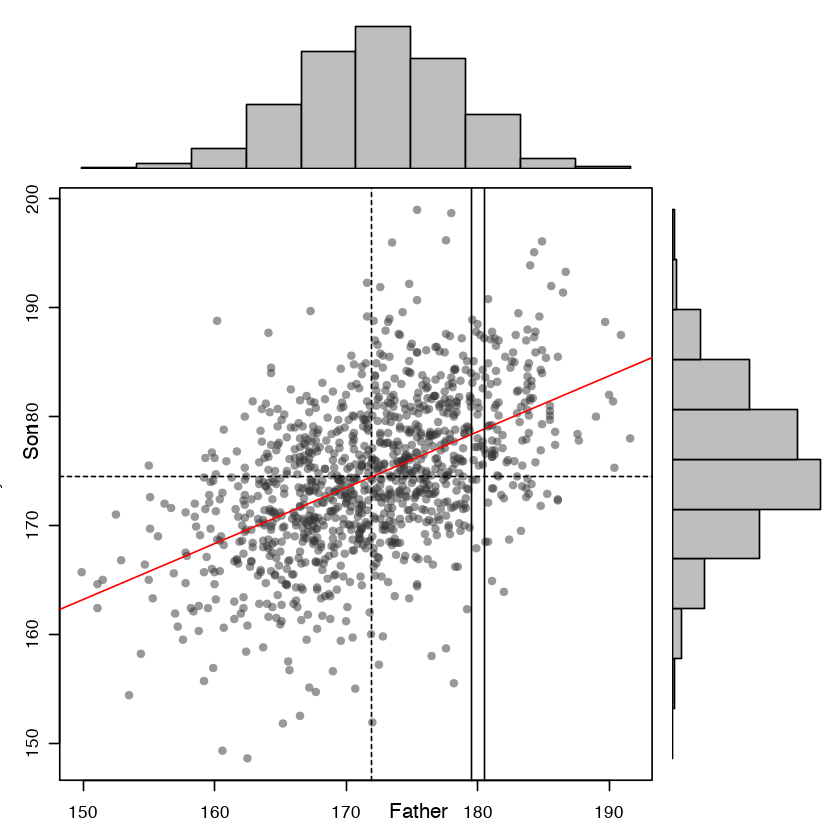

In [85]:
scatterhistaline_lm_near(heights, 180, xlab="Father", ylab="Son")

다음은 페이지 223 을 다시 리뷰하고 R-statics 결정계수에 대해서 정리합니다.